# Hiragana Character Recognition: CNN vs XGBoost

This notebook explores the effectiveness of two different machine learning models, a Convolutional Neural Network (CNN) and an Extreme Gradient Boosting (XGBoost), in recognizing Hiragana characters from images. The goal is to determine which model achieves a higher Average Precision (AP) score.

# load dataset

In [1]:
# !git clone https://github.com/inoueMashuu/hiragana-dataset.git
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow.keras.models as models
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
import re
import os
import numpy as np
import pandas as pd

location = 'hiragana-dataset/hiragana_images'
dlist = os.listdir(location)
dtable = np.array(os.listdir('hiragana-dataset/hiragana_images'))
dtable = dtable.reshape(50,20).transpose()
pattern = re.compile(r'kana([A-Z]+)')
syllables = [pattern.search(f).group(1) for f in dtable[0]]

display (pd.DataFrame(dtable, columns=syllables))

,A,BA,CHI,DA,E,FU,HA,HE,HI,HO,...,TA,TE,TO,TSU,U,WA,WO,YA,YO,YU
0,kanaA0.jpg,kanaBA0.jpg,kanaCHI0.jpg,kanaDA0.jpg,kanaE0.jpg,kanaFU0.jpg,kanaHA0.jpg,kanaHE0.jpg,kanaHI0.jpg,kanaHO0.jpg,...,kanaTA0.jpg,kanaTE0.jpg,kanaTO0.jpg,kanaTSU0.jpg,kanaU0.jpg,kanaWA0.jpg,kanaWO0.jpg,kanaYA0.jpg,kanaYO0.jpg,kanaYU0.jpg
1,kanaA1.jpg,kanaBA1.jpg,kanaCHI1.jpg,kanaDA1.jpg,kanaE1.jpg,kanaFU1.jpg,kanaHA1.jpg,kanaHE1.jpg,kanaHI1.jpg,kanaHO1.jpg,...,kanaTA1.jpg,kanaTE1.jpg,kanaTO1.jpg,kanaTSU1.jpg,kanaU1.jpg,kanaWA1.jpg,kanaWO1.jpg,kanaYA1.jpg,kanaYO1.jpg,kanaYU1.jpg
2,kanaA10.jpg,kanaBA10.jpg,kanaCHI10.jpg,kanaDA10.jpg,kanaE10.jpg,kanaFU10.jpg,kanaHA10.jpg,kanaHE10.jpg,kanaHI10.jpg,kanaHO10.jpg,...,kanaTA10.jpg,kanaTE10.jpg,kanaTO10.jpg,kanaTSU10.jpg,kanaU10.jpg,kanaWA10.jpg,kanaWO10.jpg,kanaYA10.jpg,kanaYO10.jpg,kanaYU10.jpg
3,kanaA11.jpg,kanaBA11.jpg,kanaCHI11.jpg,kanaDA11.jpg,kanaE11.jpg,kanaFU11.jpg,kanaHA11.jpg,kanaHE11.jpg,kanaHI11.jpg,kanaHO11.jpg,...,kanaTA11.jpg,kanaTE11.jpg,kanaTO11.jpg,kanaTSU11.jpg,kanaU11.jpg,kanaWA11.jpg,kanaWO11.jpg,kanaYA11.jpg,kanaYO11.jpg,kanaYU11.jpg
4,kanaA12.jpg,kanaBA12.jpg,kanaCHI12.jpg,kanaDA12.jpg,kanaE12.jpg,kanaFU12.jpg,kanaHA12.jpg,kanaHE12.jpg,kanaHI12.jpg,kanaHO12.jpg,...,kanaTA12.jpg,kanaTE12.jpg,kanaTO12.jpg,kanaTSU12.jpg,kanaU12.jpg,kanaWA12.jpg,kanaWO12.jpg,kanaYA12.jpg,kanaYO12.jpg,kanaYU12.jpg
5,kanaA13.jpg,kanaBA13.jpg,kanaCHI13.jpg,kanaDA13.jpg,kanaE13.jpg,kanaFU13.jpg,kanaHA13.jpg,kanaHE13.jpg,kanaHI13.jpg,kanaHO13.jpg,...,kanaTA13.jpg,kanaTE13.jpg,kanaTO13.jpg,kanaTSU13.jpg,kanaU13.jpg,kanaWA13.jpg,kanaWO13.jpg,kanaYA13.jpg,kanaYO13.jpg,kanaYU13.jpg
6,kanaA14.jpg,kanaBA14.jpg,kanaCHI14.jpg,kanaDA14.jpg,kanaE14.jpg,kanaFU14.jpg,kanaHA14.jpg,kanaHE14.jpg,kanaHI14.jpg,kanaHO14.jpg,...,kanaTA14.jpg,kanaTE14.jpg,kanaTO14.jpg,kanaTSU14.jpg,kanaU14.jpg,kanaWA14.jpg,kanaWO14.jpg,kanaYA14.jpg,kanaYO14.jpg,kanaYU14.jpg
7,kanaA15.jpg,kanaBA15.jpg,kanaCHI15.jpg,kanaDA15.jpg,kanaE15.jpg,kanaFU15.jpg,kanaHA15.jpg,kanaHE15.jpg,kanaHI15.jpg,kanaHO15.jpg,...,kanaTA15.jpg,kanaTE15.jpg,kanaTO15.jpg,kanaTSU15.jpg,kanaU15.jpg,kanaWA15.jpg,kanaWO15.jpg,kanaYA15.jpg,kanaYO15.jpg,kanaYU15.jpg
8,kanaA16.jpg,kanaBA16.jpg,kanaCHI16.jpg,kanaDA16.jpg,kanaE16.jpg,kanaFU16.jpg,kanaHA16.jpg,kanaHE16.jpg,kanaHI16.jpg,kanaHO16.jpg,...,kanaTA16.jpg,kanaTE16.jpg,kanaTO16.jpg,kanaTSU16.jpg,kanaU16.jpg,kanaWA16.jpg,kanaWO16.jpg,kanaYA16.jpg,kanaYO16.jpg,kanaYU16.jpg
9,kanaA17.jpg,kanaBA17.jpg,kanaCHI17.jpg,kanaDA17.jpg,kanaE17.jpg,kanaFU17.jpg,kanaHA17.jpg,kanaHE17.jpg,kanaHI17.jpg,kanaHO17.jpg,...,kanaTA17.jpg,kanaTE17.jpg,kanaTO17.jpg,kanaTSU17.jpg,kanaU17.jpg,kanaWA17.jpg,kanaWO17.jpg,kanaYA17.jpg,kanaYO17.jpg,kanaYU17.jpg


# perform CNN

In [3]:
import csv

# Define the kana characters and their corresponding labels
kana_characters = [
    'A', 'I', 'U', 'E', 'O', 'MA', 'MI', 'MU', 'ME', 'MO',
    'KA', 'KI', 'KU', 'KE', 'KO', 'SA', 'SHI', 'SU', 'SE', 'SO',
    'YA', 'YU', 'YO', 'WA', 'WO', 'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA', 'NI', 'NU', 'NE', 'NO', 'HA', 'HI', 'FU', 'HE', 'HO',
    'RA', 'RI', 'RU', 'RE', 'RO', 'N', 'DA', 'JI', 'BA', 'PI'
]

# Initialize variables
image_data = []
k = 0

# Loop through each kana character and generate image names and labels
for kana in kana_characters:
    for i in range(20):
        image_name = f'hiragana-dataset/hiragana_images/kana{kana}{i}.jpg'
        label = kana
        image_data.append([image_name, label])
    k += 1

# Write the data to a CSV file
csv_file = 'hiragana_dataset2.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ImageName', 'Label'])  # Write header
    csvwriter.writerows(image_data)

print(f'Data successfully written to {csv_file}')

cv = pd.read_csv(csv_file)
cv.head(100)

Data successfully written to hiragana_dataset2.csv


,ImageName,Label
0,hiragana-dataset/hiragana_images/kanaA0.jpg,A
1,hiragana-dataset/hiragana_images/kanaA1.jpg,A
2,hiragana-dataset/hiragana_images/kanaA2.jpg,A
3,hiragana-dataset/hiragana_images/kanaA3.jpg,A
4,hiragana-dataset/hiragana_images/kanaA4.jpg,A
...,...,...
95,hiragana-dataset/hiragana_images/kanaO15.jpg,O
96,hiragana-dataset/hiragana_images/kanaO16.jpg,O
97,hiragana-dataset/hiragana_images/kanaO17.jpg,O
98,hiragana-dataset/hiragana_images/kanaO18.jpg,O


In [4]:
from PIL import Image
img_width, img_height = 32, 32

# Load images and labels
images = []
labels = []
for index, row in cv.iterrows():
    img = Image.open(row['ImageName']).convert('L')  # convert image to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    images.append(img_array)
    label = row['Label']
    if pd.isna(label) or label == 'NA':
        label = 'NA'
    labels.append(label)
images = np.array(images)
labels = np.array(labels)

images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

999


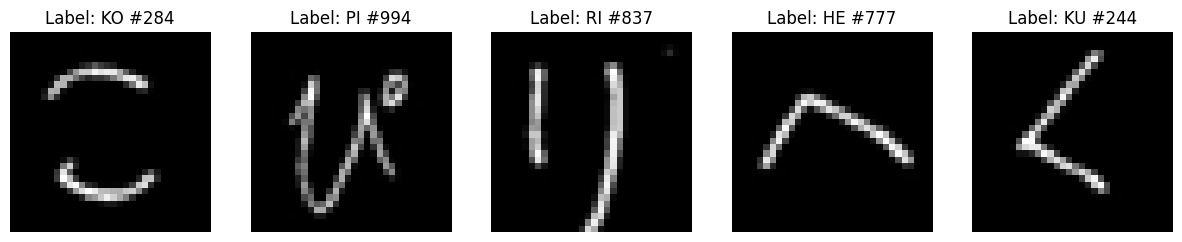

In [5]:
import matplotlib.pyplot as plt
import random

dataset_len = len(labels) - 1
print('length of dataset:', dataset_len)
fig, axs = plt.subplots(1,5, figsize=(15,3))
axs = axs.flatten()

for i in range(5):
    ran = random.randint(0, dataset_len)
    ax = axs[i]
    ax.imshow(images[ran].reshape(img_width, img_height), cmap='gray')
    ax.set_title("Label: " + labels[ran] + f' #{ran}')
    ax.axis('off')

In [6]:
flat_images = images.reshape((images.shape[0], -1))

# Create column names for the pixel values
pixel_columns = [f'pixel_{i+1}' for i in range(flat_images.shape[1])]

# Create the DataFrame
df = pd.DataFrame(flat_images, columns=pixel_columns)
df['label'] = labels


label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(df['label'])


# Display the DataFrame
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,pixel_1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [7]:


# Separate features and labels
X = df[pixel_columns].values
y = y_numeric

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert to one-hot encoding
# Reshape the data back to 2D images
X_train = X_train.reshape((-1, img_width, img_height, 1))
X_test = X_test.reshape((-1, img_width, img_height, 1))

# Convert labels to one-hot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train)
y_test_cnn = tf.keras.utils.to_categorical(y_test)



In [8]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cnn, epochs=10, validation_data=(X_test, y_test_cnn))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cnn, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/10


c:\Users\duterte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0481 - loss: 8.4863 - val_accuracy: 0.1400 - val_loss: 3.4256
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2074 - loss: 3.0735 - val_accuracy: 0.4350 - val_loss: 2.1965
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6044 - loss: 1.5055 - val_accuracy: 0.6800 - val_loss: 1.1870
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8613 - loss: 0.5281 - val_accuracy: 0.7750 - val_loss: 0.8444
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9414 - loss: 0.2184 - val_accuracy: 0.7850 - val_loss: 0.7288
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9671 - loss: 0.1079 - val_accuracy: 0.7900 - val_loss: 0.7502
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9817 - loss: 0.0851 - val_accuracy: 0.8450 - val_loss: 0.5478
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9962 - loss: 0.0280 - val_accuracy: 0.8550 - val_loss: 0.4568
Ep

# perform XGBoost

## extract X as input and Y as output

In [9]:
# get Y as output. not as string, but integer indeces
Y = [syllables.index(pattern.search(f).group(1)) for f in dlist]
# extract X as input
from PIL import Image
import os
# input must be flattened. the model is based on 1d row input and 1d column output
X = [np.array(Image.open(os.path.join(location, im)).convert('L')).flatten() for im in dlist]

## split dataset

In [10]:
import tensorflow as tf
# Assuming X and Y are numpy arrays or can be converted to numpy arrays
# Convert TensorFlow tensors to numpy arrays if they are not already
X_np = X.numpy() if isinstance(X, tf.Tensor) else np.array(X)
Y_np = Y.numpy() if isinstance(Y, tf.Tensor) else np.array(Y)

# Perform stratified split
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_np, Y_np,
                                                  test_size=0.1,
                                                  stratify=Y_np,
                                                  random_state=19)

## build and train the model

In [11]:
# import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# do not use objective='binary:logistic'. we have fifty classes so it's not a binary classification
xgb = XGBClassifier(objective='multi:softmax', random_state=0, verbosity=3)
# these were proven to be the best parameters
xgb_params = {
              'colsample_bytree': [0.7],
              'learning_rate': [0.9],
              'max_depth': [6],
              'min_child_weight': [5],
              'n_estimators': [15],
              'subsample': [.71],
              }

xgb_cv = GridSearchCV(xgb,
                      xgb_params,
                      scoring = 'accuracy',
                      cv = 5,
                      refit = 'f1'
                     )
xgb_cv = xgb_cv.fit(X_train, Y_train)
display(xgb_cv)

[21:29:24] ======== Monitor (0): HostSketchContainer ========
[21:29:24] AllReduce: 0.012815s, 1 calls @ 12815us

[21:29:24] MakeCuts: 0.02118s, 1 calls @ 21180us

[21:29:24] DEBUG: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\gbm\gbtree.cc:130: Using tree method: 0
[21:29:43] ======== Monitor (0): Learner ========
[21:29:43] Configure: 0.002055s, 1 calls @ 2055us

[21:29:43] EvalOneIter: 0.000165s, 15 calls @ 165us

[21:29:43] GetGradient: 0.005644s, 15 calls @ 5644us

[21:29:43] PredictRaw: 7e-05s, 15 calls @ 70us

[21:29:43] UpdateOneIter: 19.227s, 15 calls @ 19226975us

[21:29:43] ======== Monitor (0): GBTree ========
[21:29:43] BoostNewTrees: 19.219s, 15 calls @ 19218986us

[21:29:43] CommitModel: 6.2e-05s, 15 calls @ 62us

[21:29:43] ======== Monitor (0): HistUpdater ========
[21:29:43] BuildHistogram: 5.45235s, 558 calls @ 5452346us

[21:29:43] EvaluateSplits: 1.37023s, 1308 calls @ 1370225us

[21:29:43] I

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.9],
                         'max_depth': [6], 'min_child_weight': [5],
                         'n_estimators': [15], 'subsample': [0.71]},
             refit='f1', scoring='accuracy')

## evaluate model

Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.9, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 15, 'subsample': 0.71}
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      1.00      0.80         2
           2       0.33      0.50      0.40         2
           3       0.33      0.50      0.40         2
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         2
           6       0.50      0.50      0.50         2
           7       0.67      1.00      0.80         2
           8       0.50      0.50      0.50         2
           9       0.40      1.00      0.57         2
          10       0.00      0.00      0.00         2
          11       0.33      0.50      0.40         2
          12       0.50      1.00      0.67         2
          13       0.50      0.50      0.50         2
          14       0.00      0.0

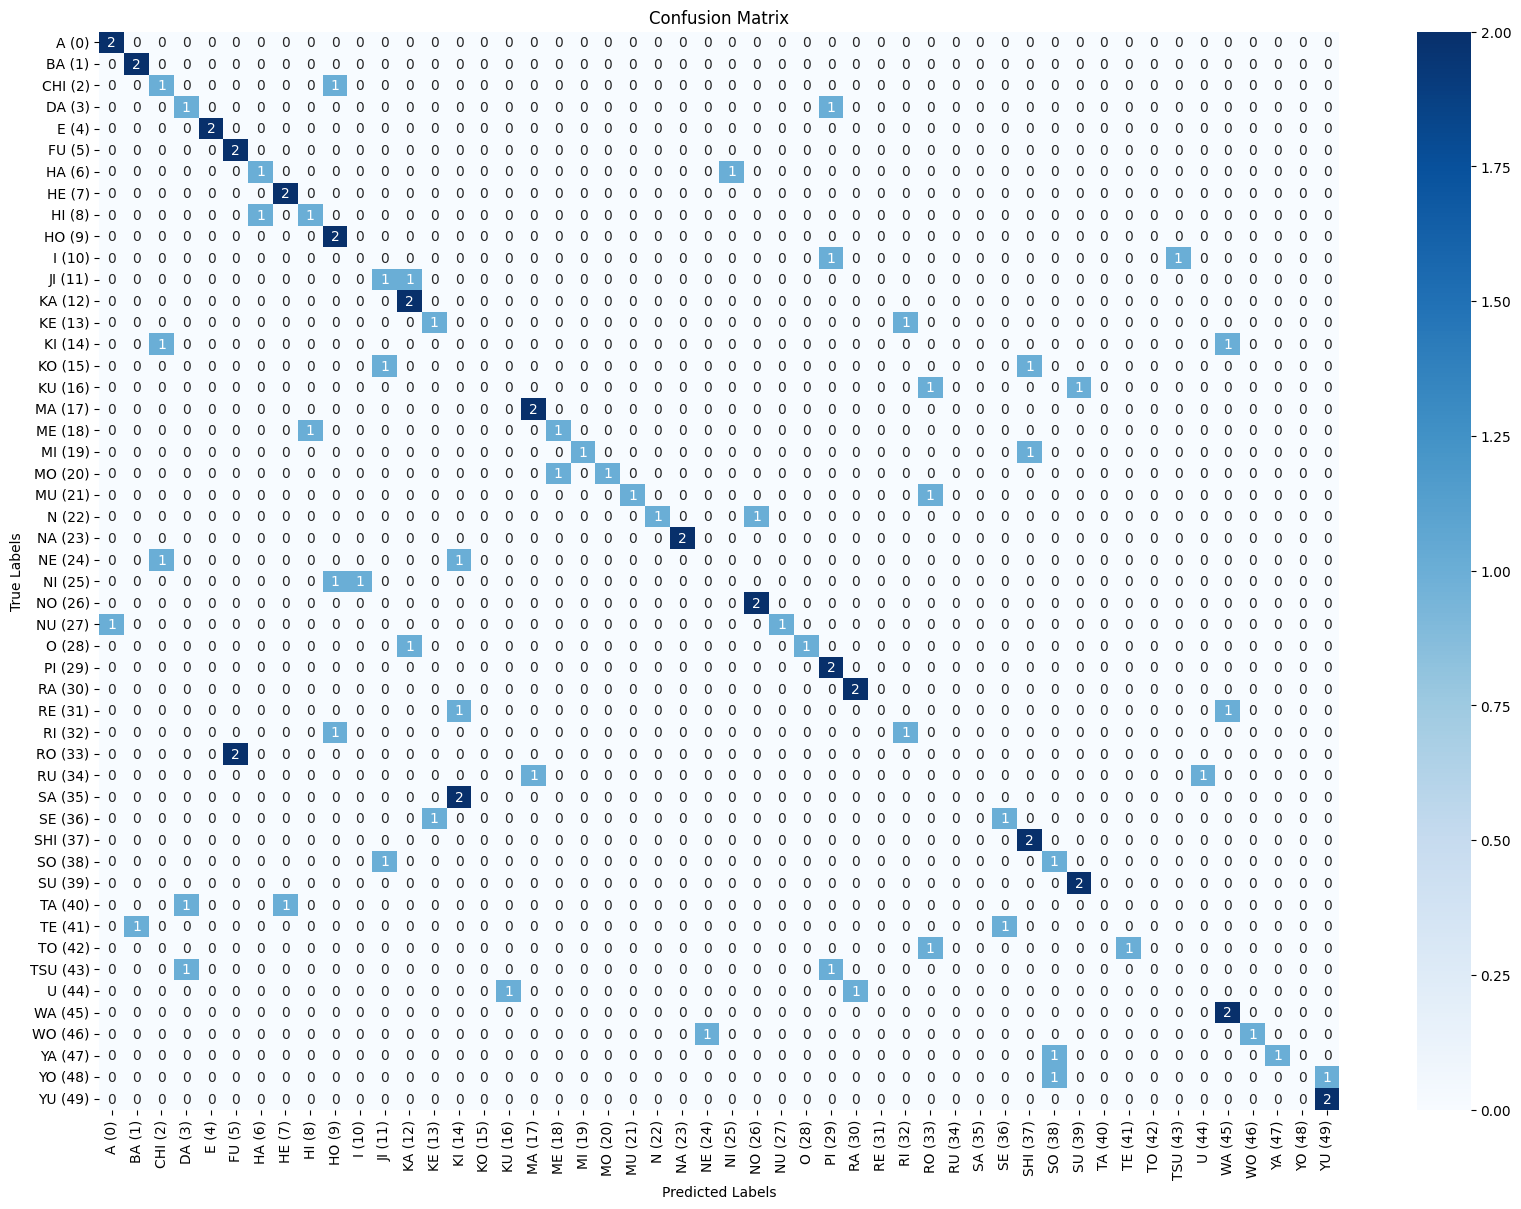

In [13]:
best_model = xgb_cv.best_estimator_
best_model = xgb_cv.best_estimator_
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(Y_val, y_pred)

# print(f"Best Parameters: {xgb_cv.best_params_}")
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
print(classification_report(Y_val, y_pred, zero_division=0.0))

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, y_pred)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=[f'{syllables[i]} ({i})' for i in range(conf_matrix.shape[0])],
                              columns=[f'{syllables[i]} ({i})' for i in range(conf_matrix.shape[1])])

# Plot the confusion matrix
plt.figure(figsize=(20, 14))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# perform SVR

In [14]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the scaler and the SVR model
scaler = StandardScaler()
svc = SVC(kernel='rbf')

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

# Define the hyperparameters to tune
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01]
}

In [15]:


# Grid Search
grid_search_svm = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
'''
please redeclare y_train
-terts
'''
grid_search_svm.fit(X_train_flat, y_train)
model_svm = grid_search_svm.best_estimator_
svm_predictions = grid_search_svm.predict(X_test_flat)
accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions, average='weighted')
recall = recall_score(y_test, svm_predictions, average='weighted')
f1 = f1_score(y_test, svm_predictions, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

report = classification_report(y_test, svm_predictions)
print("Classification Report:\n", report)

ValueError: Found input variables with inconsistent numbers of samples: [900, 800]